In [2]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')
#import the useful libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
previous_data = pd.read_csv(r'C:\Users\91797\Desktop\previous_application.csv')
application_data = pd.read_csv(r'C:\Users\91797\Desktop\application_data (1).csv')
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


read the files

In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


check the information

In [6]:
application_data.shape

(307511, 122)

In [7]:
previous_data.shape

(1670214, 37)

In [8]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


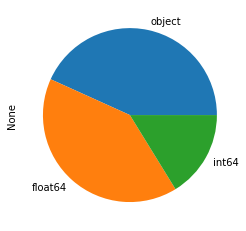

In [12]:
previous_data.dtypes.value_counts().plot(kind='pie')
plt.show()

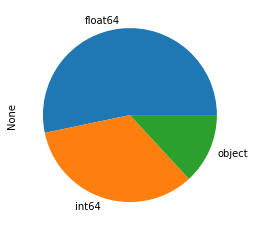

In [13]:
application_data.dtypes.value_counts().plot(kind='pie')
plt.show()

filter the Null Values

In [14]:
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

In [15]:
null_values(application_data)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_HOUSING_TYPE            0.00
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [15]:
null_values(previous_data)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

null value greater than 40 percent

In [16]:
null_40 = null_values(application_data)[null_values(application_data)>40]

In [17]:
null_40

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [17]:
null_40.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

In [18]:
application_data.drop(columns = null_40.index, inplace = True)

In [19]:
application_data.shape

(307511, 73)

identify the defaulter

In [20]:

defaulter=application_data[application_data.TARGET==1]
defaulter.shape

(24825, 73)

identify non defaulter

In [21]:
non_defaulter=application_data[application_data.TARGET==0]
non_defaulter.shape

(282686, 73)

plot defaulter vs nondefaulter

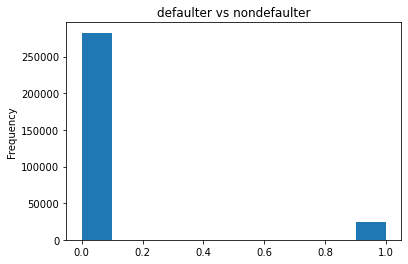

In [22]:
application_data.TARGET.plot.hist()
plt.title('defaulter vs nondefaulter')

plt.show()

#its concluded that there is only few defaulters

    identify the how many contract type are there

In [23]:
application_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

plot the graph against contract type

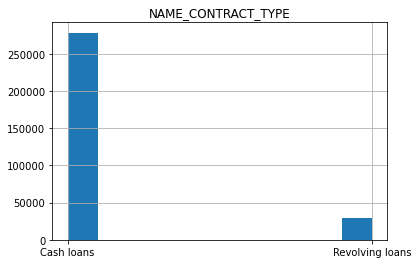

In [24]:
application_data.NAME_CONTRACT_TYPE.hist()
plt.title('NAME_CONTRACT_TYPE')
plt.show()

identify the how many occupation type are there

In [25]:
application_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

plot graph againt occupation type

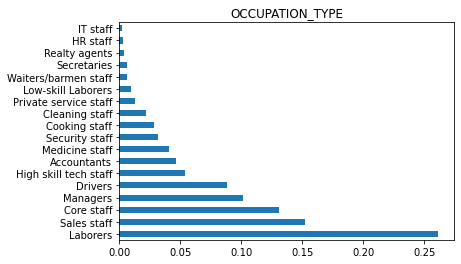

In [26]:
application_data.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title('OCCUPATION_TYPE')
plt.show()

    identify the contract status

In [27]:
previous_data.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

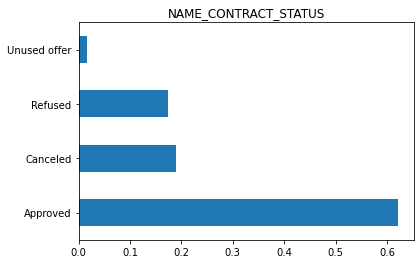

In [28]:
previous_data.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.barh()
plt.title('NAME_CONTRACT_STATUS')
plt.show()

    identify the CASH_LOAN_PURPOSE status

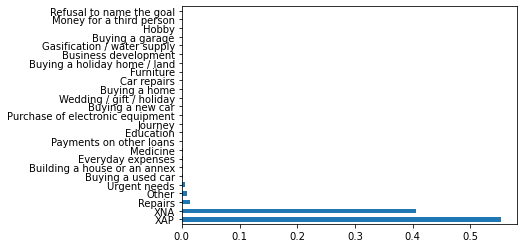

In [29]:
previous_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.barh()
plt.show()

    identify the PAYMENT TYPE status

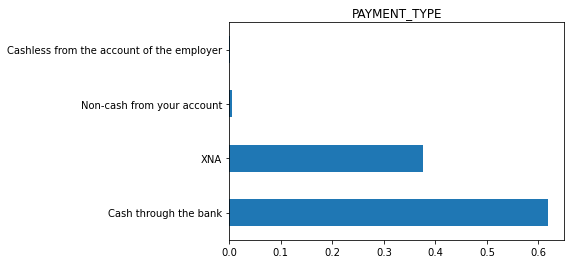

In [30]:

previous_data.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.barh()
plt.title('PAYMENT_TYPE')
plt.show()

identify the client type

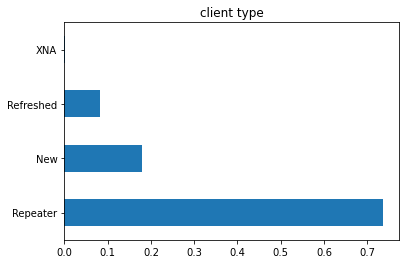

In [31]:
previous_data.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.barh()
plt.title('client type')
plt.show()

identify the income type

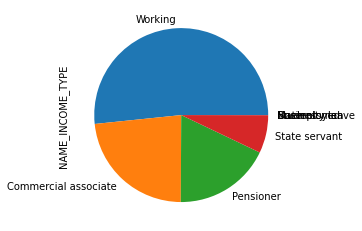

In [32]:
application_data.NAME_INCOME_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

why the previous loan was rejected

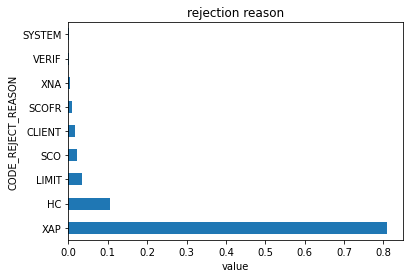

In [33]:
previous_data.CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()
plt.title('rejection reason')
plt.ylabel('CODE_REJECT_REASON')
plt.xlabel('value')
plt.show()

identify the contract status

In [35]:
previous_data.groupby('NAME_CONTRACT_STATUS').aggregate(['mean', 'median'])


SK_ID_PREV                SK_ID_CURR            \
                              mean     median           mean    median   
NAME_CONTRACT_STATUS                                                     
Approved              1.903648e+06  1896641.0  278241.802994  278447.0   
Canceled              1.957212e+06  1968119.0  278422.568376  278933.0   
Refused               1.953630e+06  1965504.5  278706.285326  279433.5   
Unused offer          1.941419e+06  1949253.5  278260.720911  278947.5   

                       AMT_ANNUITY            AMT_APPLICATION            \
                              mean     median            mean    median   
NAME_CONTRACT_STATUS                                                      
Approved              14720.350105  10380.240   180567.000949   90000.0   
Canceled              30289.763892  26474.625    22730.011481       0.0   
Refused               20498.160274  15653.880   331760.510938  166050.0   
Unused offer          10145.798635   9980.640    69760.732970   57960.0   

                         AMT_CREDIT            ... DAYS_FIRST_DUE         \
                               mean    median  ...           mean median   
NAME_CONTRACT_STATUS                           ...                         
Approved              202564.182131  102208.5  ...   13826.269337 -831.0   
Canceled               24187.057127       0.0  ...            NaN    NaN   
Refused               371689.841222  182956.5  ...            NaN    NaN   
Unused offer           69783.990800   57960.0  ...            NaN    NaN   

                     DAYS_LAST_DUE_1ST_VERSION        DAYS_LAST_DUE         \
                                          mean median          mean median   
NAME_CONTRACT_STATUS                                                         
Approved                          33767.774054 -361.0  76582.403064 -537.0   
Canceled                                   NaN    NaN           NaN    NaN   
Refused                                    NaN    NaN           NaN    NaN   
Unused offer                               NaN    NaN           NaN    NaN   

                     DAYS_TERMINATION        NFLAG_INSURED_ON_APPROVAL         
                                 mean median                      mean median  
NAME_CONTRACT_STATUS                                                           
Approved                 81992.343838 -499.0                   0.33257    0.0  
Canceled                          NaN    NaN                       NaN    NaN  
Refused                           NaN    NaN                       NaN    NaN  
Unused offer                      NaN    NaN                       NaN    NaN  

[4 rows x 42 columns]

analysis income type vs total income

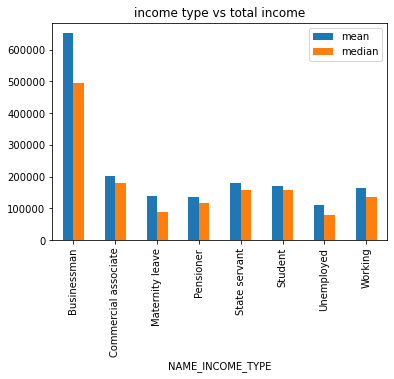

In [36]:
application_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean', 'median']).plot.bar()
plt.title('income type vs total income')
plt.show()

analysis product type vs laon amount application

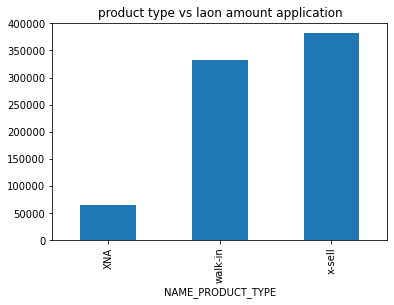

In [37]:
previous_data.groupby('NAME_PRODUCT_TYPE')['AMT_APPLICATION'].mean().plot.bar()
plt.title('product type vs laon amount application')
plt.show()

Bivariate analysis 

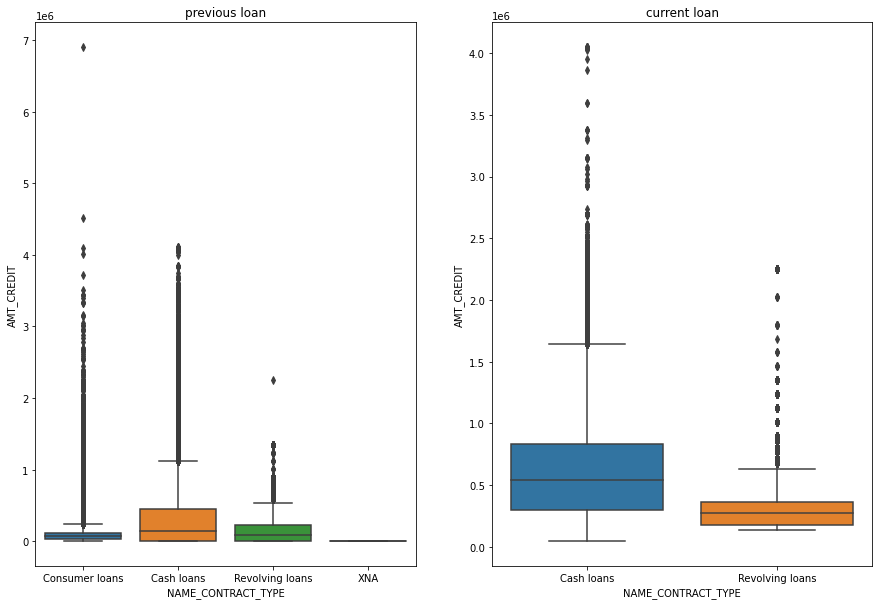

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.boxplot(x=previous_data.NAME_CONTRACT_TYPE, y=previous_data.AMT_CREDIT)
plt.title('previous loan')
plt.subplot(1, 2, 2)
sns.boxplot(x=application_data.NAME_CONTRACT_TYPE, y=application_data.AMT_CREDIT)
plt.title('current loan')
plt.show()

Plotting Client's Education Type

In [39]:
application_data.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

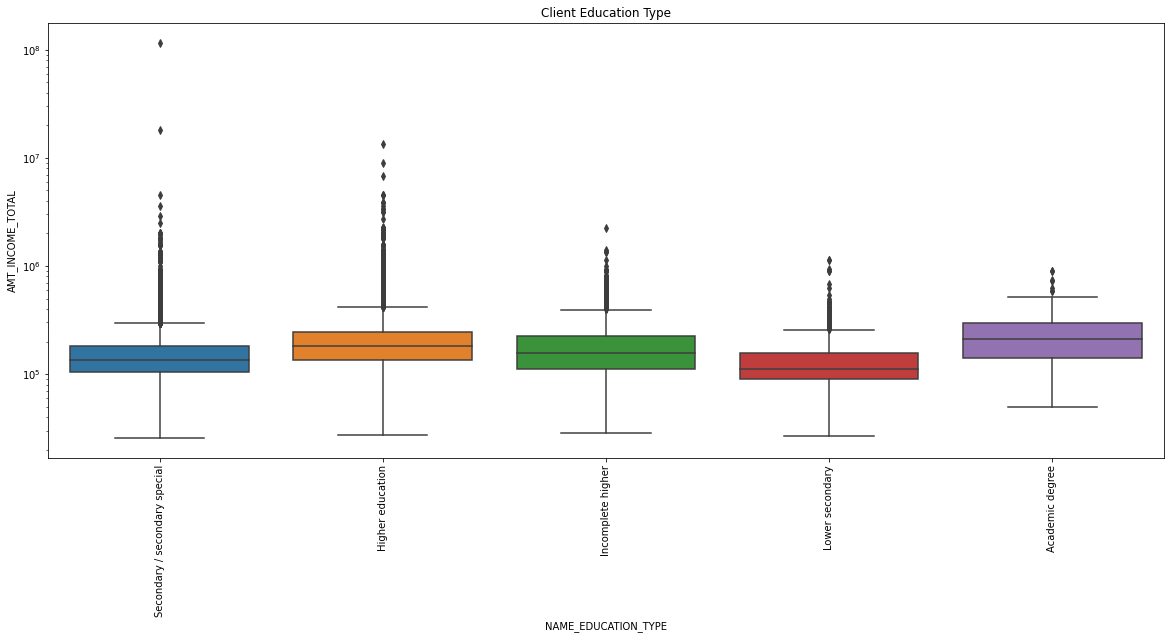

In [40]:
plt.figure(figsize=(20,8)) 
ax = sns.boxplot(x=application_data.NAME_EDUCATION_TYPE, y=application_data.AMT_INCOME_TOTAL)
plt.title('Client Education Type')
plt.xticks(rotation=90)
plt.yscale('log')


<AxesSubplot:>

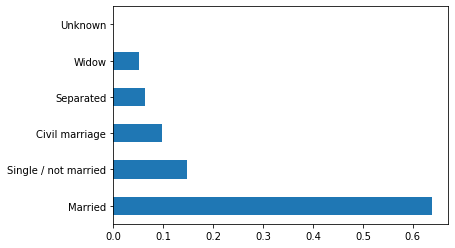

In [41]:
#Plotting Client's Family Status
application_data.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()

Multivariate analysis
NAME_FAMILY_STATUS vs OCCUPATION_TYPE vs TARGET

In [42]:
data = pd.pivot_table(data=application_data, index='OCCUPATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
data

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
OCCUPATION_TYPE,,,,,,
Accountants,0.039370,0.046744,0.053352,0.058704,0.0,0.044521
Cleaning staff,0.102612,0.096250,0.078652,0.122066,NaN,0.067265
Cooking staff,0.120397,0.097944,0.084135,0.144550,NaN,0.059859
Core staff,0.077809,0.058064,0.057576,0.080491,NaN,0.038880
Drivers,0.146597,0.101009,0.145655,0.147986,NaN,0.153153
HR staff,0.136364,0.046832,0.065217,0.066667,NaN,0.200000
High skill tech staff,0.079108,0.057012,0.061252,0.072008,NaN,0.048327
IT staff,0.095238,0.069536,0.000000,0.060000,NaN,0.000000
Laborers,0.129185,0.096642,0.109462,0.132301,NaN,0.069250


In [43]:
application_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

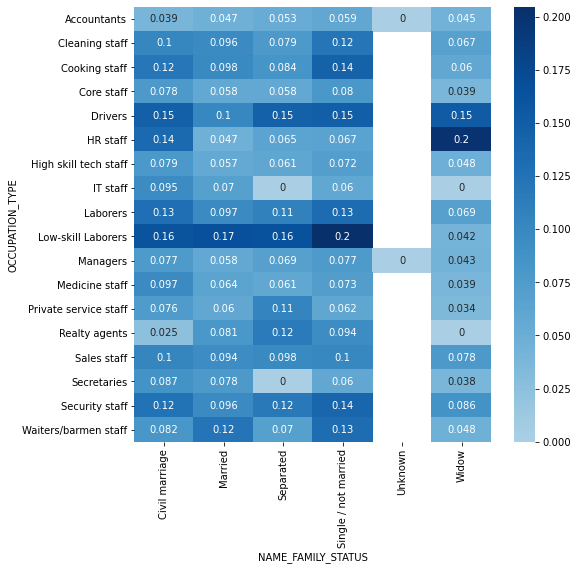

In [60]:
plt.figure(figsize=(8,8))
sns.heatmap(data, annot=True, cmap='Blues', center=0.050)
plt.show()

NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE vs TARGET

In [44]:
new_data = pd.pivot_table(data=application_data, index='NAME_EDUCATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
new_data

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_EDUCATION_TYPE,,,,,,
Academic degree,0.000000,0.018868,0.000000,0.034483,NaN,0.000000
Higher education,0.066196,0.049646,0.057346,0.062049,0.0,0.048094
Incomplete higher,0.092481,0.079144,0.086643,0.094143,NaN,0.063584
Lower secondary,0.135922,0.102961,0.138249,0.132988,0.0,0.067961
Secondary / secondary special,0.108322,0.084136,0.089904,0.113243,NaN,0.059666


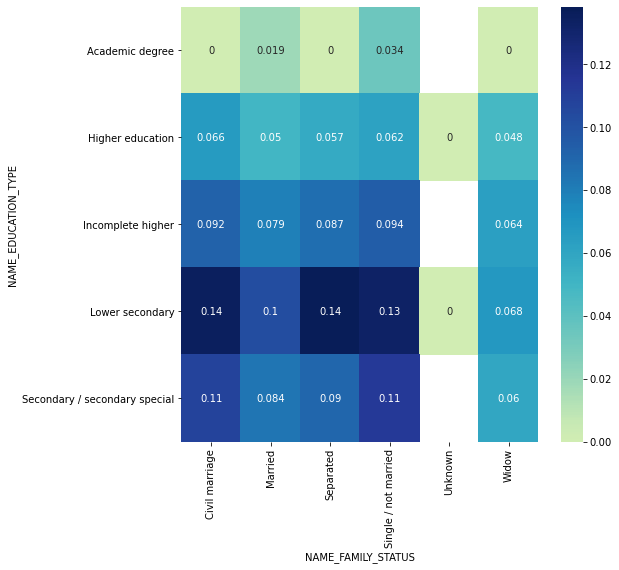

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(new_data, annot=True, cmap='YlGnBu', center=0.050)
plt.show()

positive correlation between application amount and credit amount

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

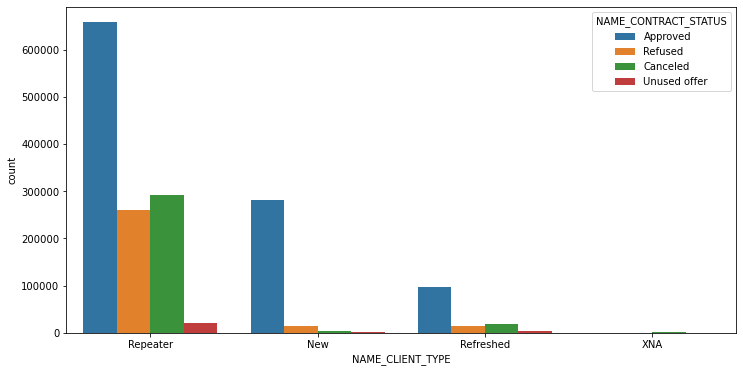

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'NAME_CLIENT_TYPE', hue = 'NAME_CONTRACT_STATUS', data = previous_data)

Both Approval and refused rate is higher for repeater clients

<AxesSubplot:xlabel='NAME_YIELD_GROUP', ylabel='count'>

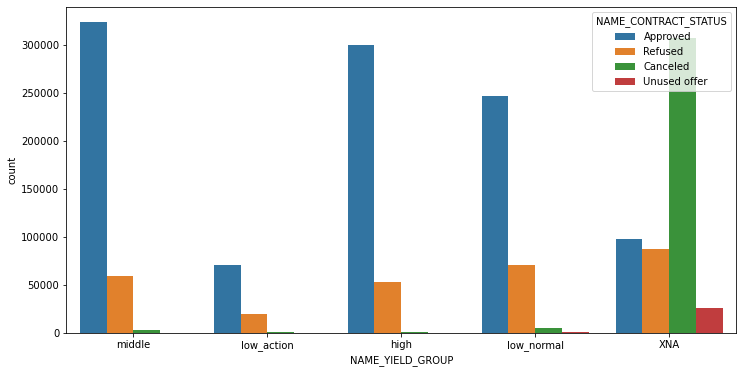

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'NAME_YIELD_GROUP', hue = 'NAME_CONTRACT_STATUS', data = previous_data)